In [3]:
from SOView import *
import shutil
import os
import gc
from scipy import sparse
import pandas as pd

In [1]:
path = '/home/yzy/PUBDT/st/spacetx/raw/BARISTASeq'

In [4]:
raw_pd = pd.read_csv(f'{path}/mouse_VISp.csv')

In [7]:
raw_pd = raw_pd.iloc[:,2:]

In [9]:
raw_pd = raw_pd.set_index('Cell ID')

In [10]:
raw_pd

,Slice,x,y,Dist to pia,Dist to bottom,Angle,Ank1,Kcnmb2,Ankrd55,Slc32a1,...,Adcy2,Kcnip4,Sparcl1,Brinp3,unused-1,unused-2,x_um,y_um,depth_um,layer
Cell ID,,,,,,,,,,,,,,,,,,,,,
10010,1,12340.30,11296.40,876.652,385.093,171.321,0,0,0,2,...,1,0,3,0,0,0,1234.030,1129.640,956.642044,outside_VISp
10012,1,12640.90,11322.40,899.412,365.843,170.042,0,0,0,0,...,0,0,1,1,0,0,1264.090,1132.240,980.101231,outside_VISp
10015,1,12153.40,11374.40,857.025,403.766,171.650,0,0,0,0,...,0,0,1,0,0,0,1215.340,1137.440,936.787264,outside_VISp
10019,1,12675.00,11397.10,897.891,368.772,169.528,0,0,0,0,...,0,0,5,1,0,0,1267.500,1139.710,978.747756,outside_VISp
10020,1,14610.40,11416.60,1061.390,258.652,138.390,0,0,0,0,...,2,0,2,0,0,0,1461.040,1141.660,1138.064192,outside_VISp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750204,3,2556.13,3448.25,428.063,779.272,154.514,0,0,0,0,...,0,0,1,0,0,0,255.613,344.825,584.851904,outside_VISp
750205,3,2156.38,3454.75,399.428,817.531,150.647,0,0,0,0,...,0,0,1,0,0,0,215.638,345.475,551.356603,outside_VISp
750206,3,1808.63,3461.25,376.139,850.840,146.828,0,0,0,0,...,0,0,1,0,0,0,180.863,346.125,522.171104,outside_VISp


In [18]:
obs_list = ['Slice','x','y','Dist to pia','Dist to bottom','Angle','unused-1','unused-2','x_um','y_um','depth_um','layer']

In [19]:
var_names = np.setdiff1d(raw_pd.columns,obs_list)

In [20]:
obs_names = raw_pd.index

In [23]:
var_names

array(['Adarb2', 'Adcy2', 'Ank1', 'Ankrd55', 'Arpp19', 'Arx', 'Atp1a3',
       'Brinp3', 'Btbd11', 'Cacna2d3', 'Calb1', 'Caln1', 'Car3', 'Car4',
       'Cck', 'Chodl', 'Chrna2', 'Cnr1', 'Crh', 'Cryab', 'Ctxn1',
       'Cxcl14', 'Dcn', 'Deptor', 'Dlx1', 'Dlx6', 'Fa2h', 'Fezf2',
       'Fgfr3', 'Gad1', 'Gad2', 'Gm11549', 'Id2', 'Igfbp6', 'Itpka',
       'Kcnip1', 'Kcnip4', 'Kcnmb2', 'Lamp5', 'Lhx6', 'Lratd2', 'Ly6c2',
       'Ly86', 'Map3k7cl', 'Ndnf', 'Neurod1', 'Neurod6', 'Nfib', 'Npy',
       'Nrgn', 'Nrn1', 'Nxph1', 'Nxph4', 'Pcp4', 'Pdgfra', 'Penk',
       'Plpp4', 'Ptn', 'Ptprd', 'Pvalb', 'Rab3b', 'Reln', 'Rorb', 'Rprml',
       'Rspo1', 'Slc17a7', 'Slc17a8', 'Slc32a1', 'Slc6a1', 'Sncg',
       'Sparcl1', 'Sst', 'Sv2b', 'Synpr', 'Syt6', 'Tesc', 'Th', 'Vip',
       'Vxn'], dtype=object)

In [31]:
var_names

array(['Adarb2', 'Adcy2', 'Ank1', 'Ankrd55', 'Arpp19', 'Arx', 'Atp1a3',
       'Brinp3', 'Btbd11', 'Cacna2d3', 'Calb1', 'Caln1', 'Car3', 'Car4',
       'Cck', 'Chodl', 'Chrna2', 'Cnr1', 'Crh', 'Cryab', 'Ctxn1',
       'Cxcl14', 'Dcn', 'Deptor', 'Dlx1', 'Dlx6', 'Fa2h', 'Fezf2',
       'Fgfr3', 'Gad1', 'Gad2', 'Gm11549', 'Id2', 'Igfbp6', 'Itpka',
       'Kcnip1', 'Kcnip4', 'Kcnmb2', 'Lamp5', 'Lhx6', 'Lratd2', 'Ly6c2',
       'Ly86', 'Map3k7cl', 'Ndnf', 'Neurod1', 'Neurod6', 'Nfib', 'Npy',
       'Nrgn', 'Nrn1', 'Nxph1', 'Nxph4', 'Pcp4', 'Pdgfra', 'Penk',
       'Plpp4', 'Ptn', 'Ptprd', 'Pvalb', 'Rab3b', 'Reln', 'Rorb', 'Rprml',
       'Rspo1', 'Slc17a7', 'Slc17a8', 'Slc32a1', 'Slc6a1', 'Sncg',
       'Sparcl1', 'Sst', 'Sv2b', 'Synpr', 'Syt6', 'Tesc', 'Th', 'Vip',
       'Vxn'], dtype=object)

In [33]:
raw_pd[list(var_names)]

,Adarb2,Adcy2,Ank1,Ankrd55,Arpp19,Arx,Atp1a3,Brinp3,Btbd11,Cacna2d3,...,Sncg,Sparcl1,Sst,Sv2b,Synpr,Syt6,Tesc,Th,Vip,Vxn
Cell ID,,,,,,,,,,,,,,,,,,,,,
10010,20,1,0,0,0,0,10,0,0,2,...,0,3,0,0,0,0,0,0,0,0
10012,4,0,0,0,0,0,4,1,1,0,...,0,1,0,2,0,0,0,0,0,2
10015,6,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10019,5,0,0,0,1,0,1,1,0,0,...,0,5,0,0,0,0,0,0,0,1
10020,8,2,0,0,2,0,7,0,0,0,...,0,2,0,5,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750204,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
750205,6,0,0,0,2,0,2,0,1,2,...,0,1,0,0,0,0,0,0,0,0
750206,2,0,0,0,1,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0


In [91]:
X = raw_pd[list(var_names)].values

In [92]:
obs_names

Int64Index([ 10010,  10012,  10015,  10019,  10020,  10021,  10022,  10023,
             10024,  10025,
            ...
            750197, 750198, 750200, 750202, 750203, 750204, 750205, 750206,
            750207, 750209],
           dtype='int64', name='Cell ID', length=11426)

In [116]:
adata = ad.AnnData(X=X)
adata.var_names = var_names
adata.obs_names = (np.array(obs_names)).astype('str')


for obs in obs_list:
    adata.obs[obs] = raw_pd[[obs]].values
# adata.obs_names = np.array(obs_names).astype('str')



/tmp/ipykernel_1146163/1316866004.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


In [112]:
adata.obs_names

Index(['10010', '10012', '10015', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025',
       ...
       '750197', '750198', '750200', '750202', '750203', '750204', '750205',
       '750206', '750207', '750209'],
      dtype='object', length=11426)

In [117]:
adata.obs['x']

10010     12340.30
10012     12640.90
10015     12153.40
10019     12675.00
10020     14610.40
            ...   
750204     2556.13
750205     2156.38
750206     1808.63
750207      715.00
750209     1238.25
Name: x, Length: 11426, dtype: float64

In [64]:
raw_pd['Slice']

Cell ID
10010     1
10012     1
10015     1
10019     1
10020     1
         ..
750204    3
750205    3
750206    3
750207    3
750209    3
Name: Slice, Length: 11426, dtype: int64

In [118]:
adata.obsm['spatial'] = np.vstack([adata.obs['x_um'],adata.obs['y_um']]).transpose()

In [123]:
adata

AnnData object with n_obs × n_vars = 11426 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer'
    obsm: 'spatial'

In [122]:
cur_adata

AnnData object with n_obs × n_vars = 3545 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer'
    uns: 'layer_colors'
    obsm: 'spatial'

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


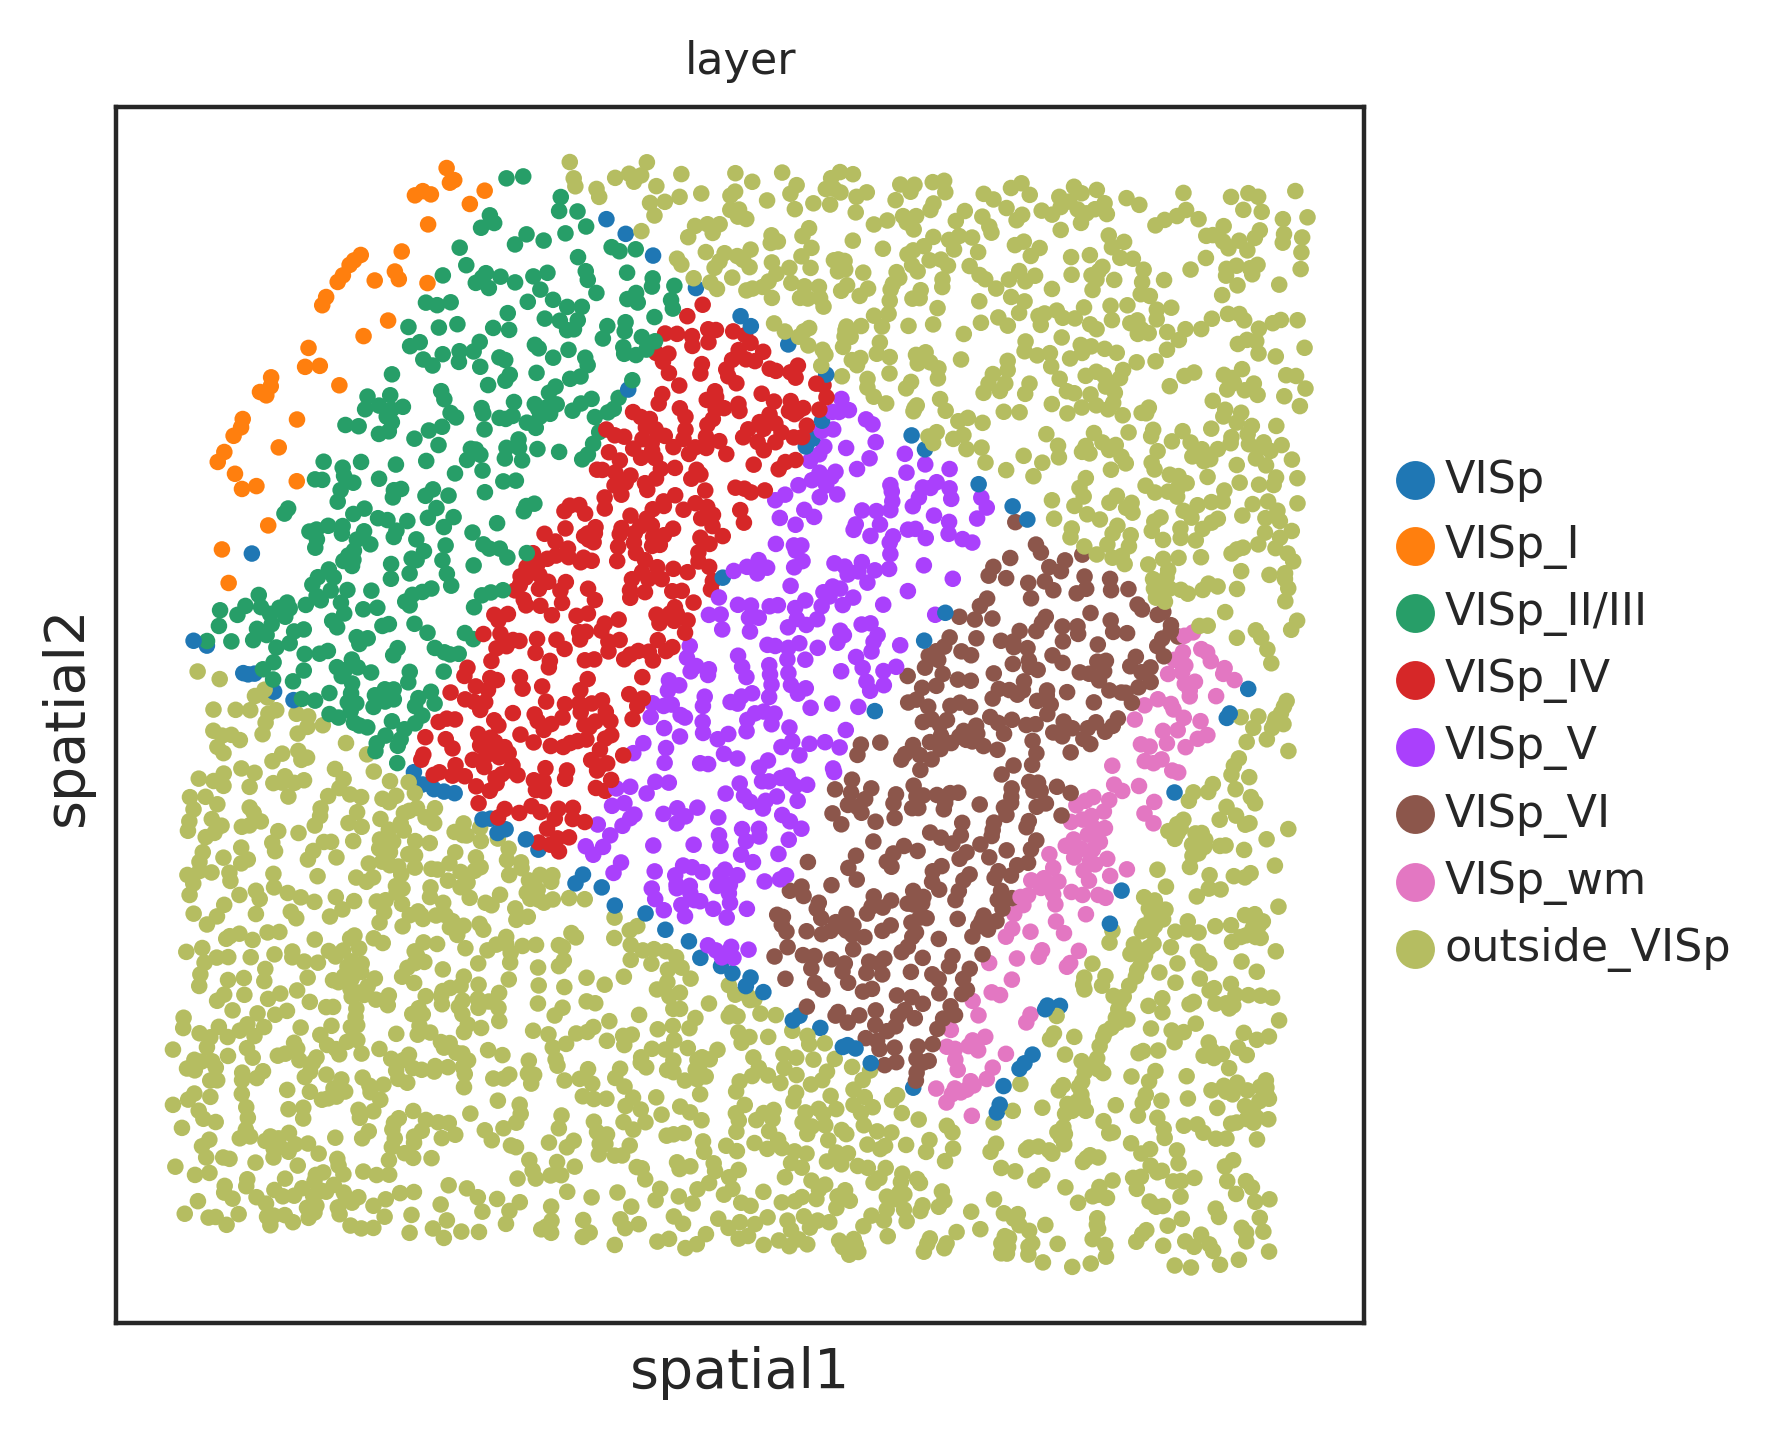

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


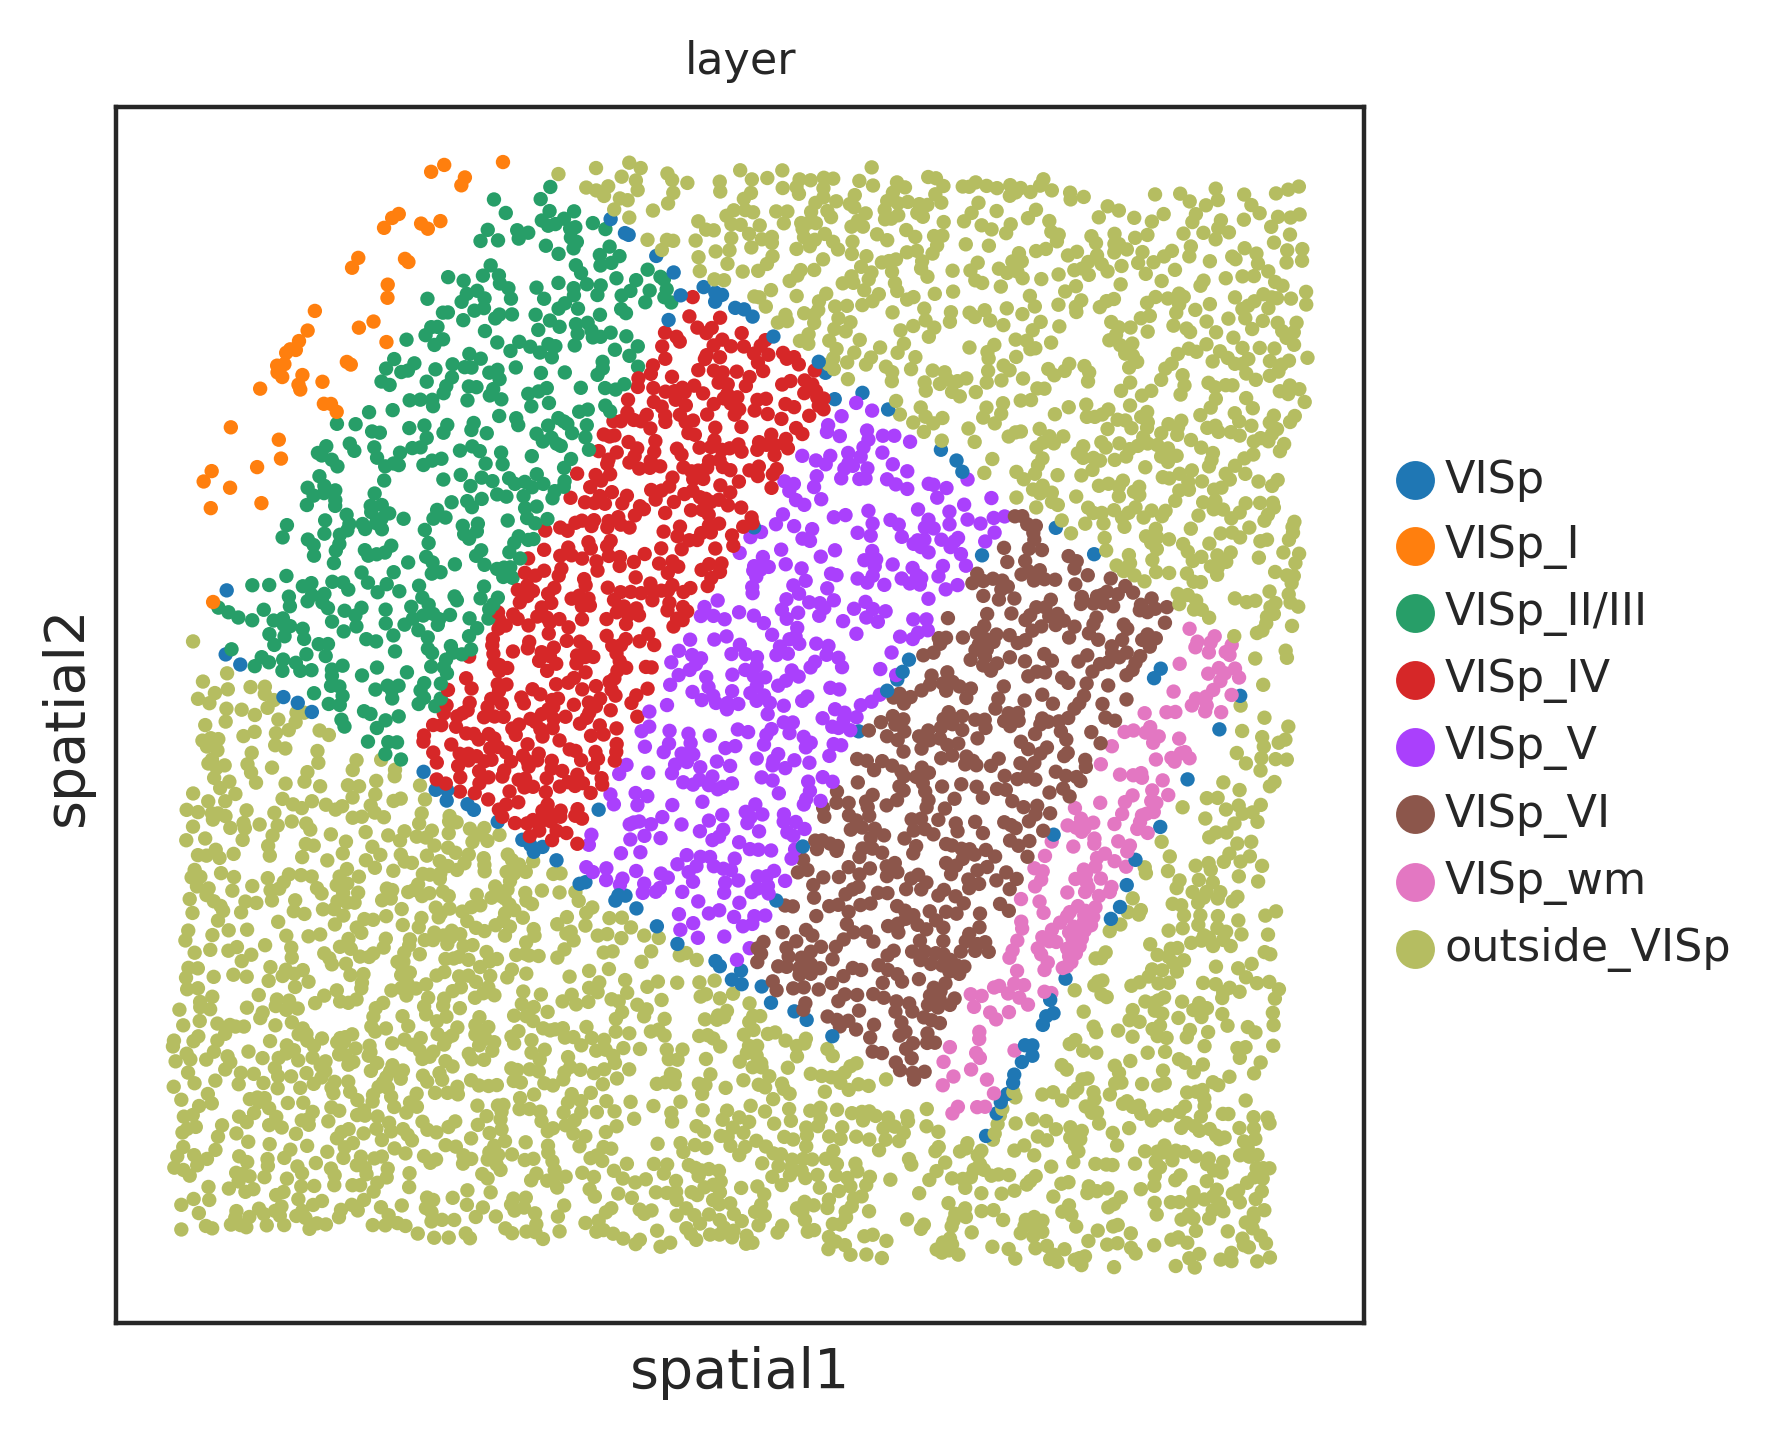

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


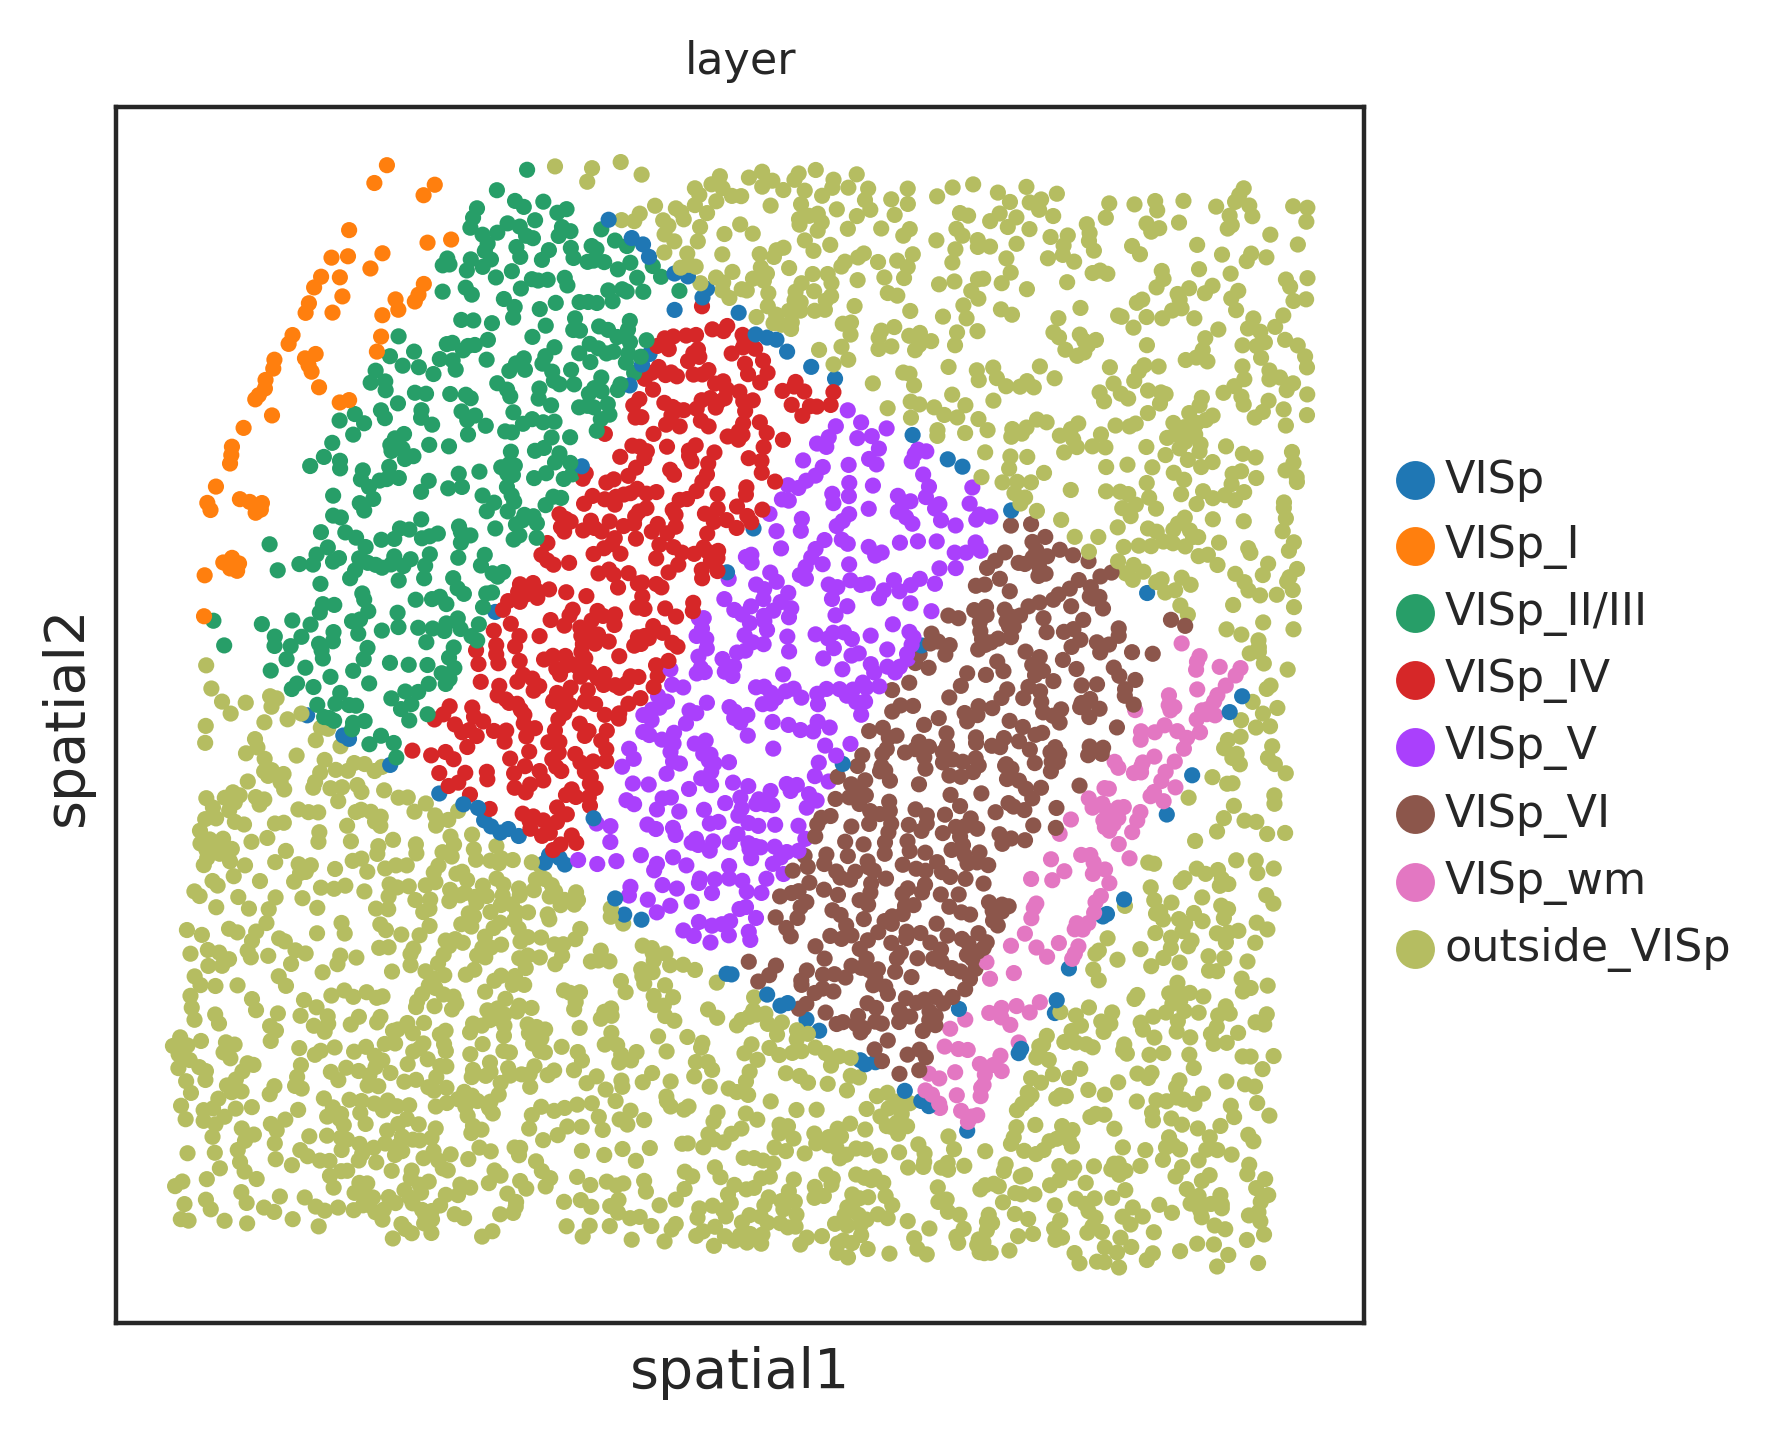

In [119]:
for Slice in np.unique(adata.obs['Slice']):
    cur_adata = adata[adata.obs['Slice']==Slice]
    cur_adata.write_h5ad(f'{path}/Slice_{Slice}.h5ad')
    sc.pl.embedding(cur_adata,basis='spatial',color=['layer'])

In [124]:
adata

AnnData object with n_obs × n_vars = 11426 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer'
    obsm: 'spatial'